# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as pty
from textblob import TextBlob

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...


In [8]:
df.to_csv("data.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

#### Data Exploration

In [9]:
df

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...
...,...
995,✅ Trip Verified | Barcelona to New York via L...
996,✅ Trip Verified | Gatwick to Fort Lauderdale....
997,✅ Trip Verified | We recently flew from Londo...
998,✅ Trip Verified | \r\nVenice to London City. ...


In [10]:
df.info() # Chech the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [9]:
df.duplicated().sum() # chack for data duplication

0

In [11]:
df.isna().sum() # check for NaN values

reviews    0
dtype: int64

#### Create Labels for the review column 

In [12]:
def get_sentiment(text):
  analysis = TextBlob(text)
  
  if analysis.sentiment.polarity > 0: 
    return 'positive'

  else:
    return 'negative'
  
df['Sentiment'] = df['reviews'].apply(get_sentiment)

In [13]:
df # perform sanity check to ensure that the reviews have been classified to give more insight

,reviews,Sentiment
0,"Not Verified | Boarded on time, but it took a...",positive
1,"✅ Trip Verified | 5 days before the flight, w...",positive
2,Not Verified | \r\nWe traveled to Lisbon for ...,negative
3,✅ Trip Verified | Booked a flight from Buchar...,negative
4,✅ Trip Verified | Booked online months ago an...,positive
...,...,...
995,✅ Trip Verified | Barcelona to New York via L...,negative
996,✅ Trip Verified | Gatwick to Fort Lauderdale....,negative
997,✅ Trip Verified | We recently flew from Londo...,positive
998,✅ Trip Verified | \r\nVenice to London City. ...,positive


#### Exploratory Data Analysis

In [14]:
#converts the sentiment labels 'negative' and 'positive' into numerical values, where 'negative' is replaced with 0, and 'positive' is replaced with 1. 
df['Sentiment'] = df['Sentiment'].replace({'negative': 0,'positive': 1})

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_create(df, sentvalue):
    reviews = df[df['Sentiment'] == sentvalue]
    words = ' '.join(reviews['reviews']) 

    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2995,
                          height=2510).generate(words)

    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

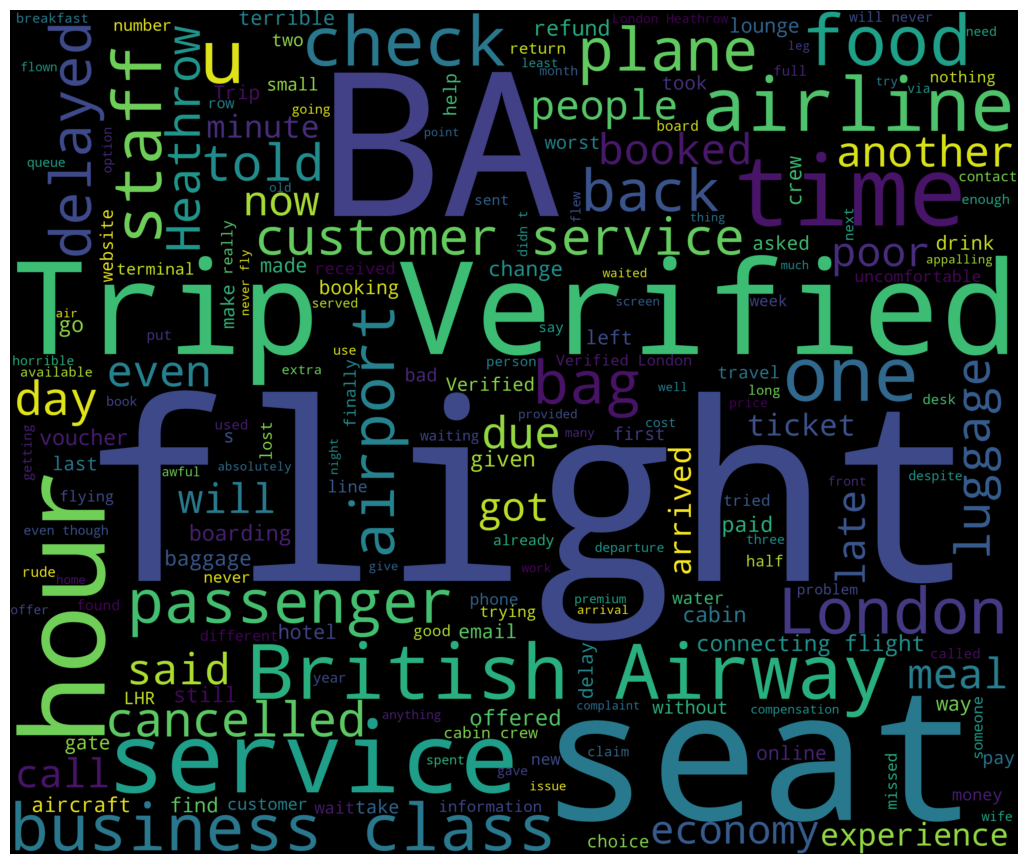

In [16]:
#show the negative reviews
wordcloud_create(df,0)

- Some of the negative words observed before data cleaning are Cancelled, Uncomfortable, delay, even, awful, terrible, refund, will never, given poor pay, never flew, missed, missed, lost, late, bad and many other.
- Data cleaning will give us more insighnt into it

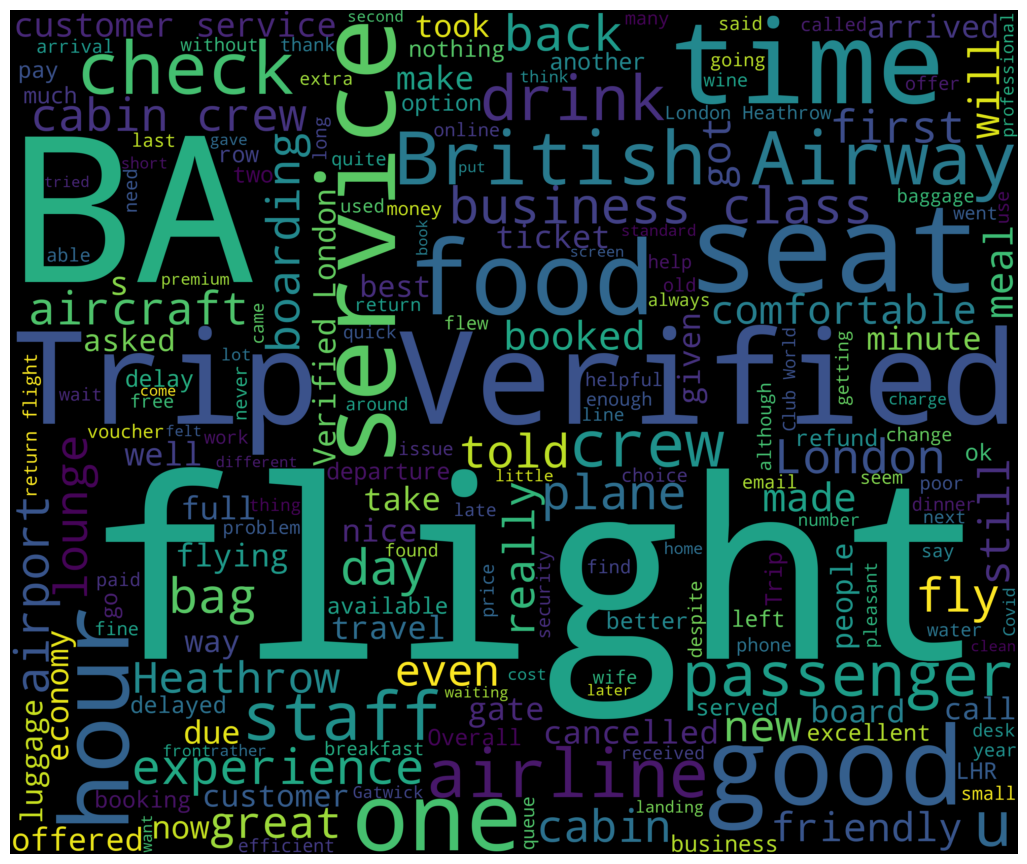

In [35]:
#show the negative reviews
wordcloud_create(df,1)

- Some of the positive word are good, new, better, available, found, nice, friendly, breakfast, comfortable, available, meal, great, well, quick, best, helpful and others

In [36]:
# check the labels of my dataframe
df['Sentiment'].value_counts()

1    641
0    359
Name: Sentiment, dtype: int64

- The positive class are 641 while the negative class is 359

In [37]:
# plotting the distribution of the labelled class

def plot_bar(df, feature):
    plot = sns.countplot(x=feature, data=df)

    # calculating the length of the total data
    total_data = len(df)

    # Display the percentage on top of each bar
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total_data:.2%}', ha="center")

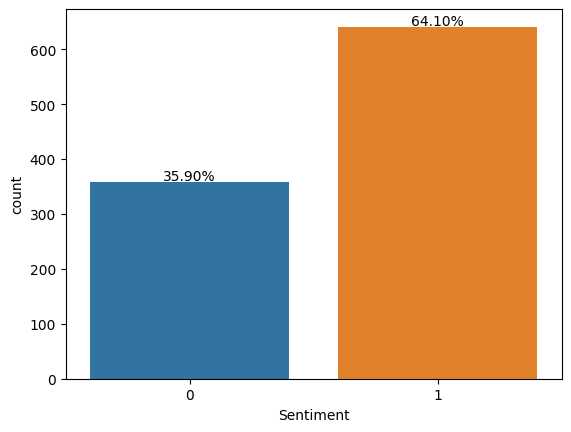

In [38]:
plot_bar(df, 'Sentiment')

#### Data Pre-processing

##### HTML Tags Removal

In [18]:
from bs4 import BeautifulSoup

def remove_html_tags(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    text = soup.get_text()
    return text

df['reviews'] = df['reviews'].apply(lambda x: remove_html_tags(x))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [19]:
df['reviews'] 

0      Not Verified |  Boarded on time, but it took a...
1      ✅ Trip Verified |  5 days before the flight, w...
2      Not Verified |  \r\nWe traveled to Lisbon for ...
3      ✅ Trip Verified |  Booked a flight from Buchar...
4      ✅ Trip Verified |  Booked online months ago an...
                             ...                        
995    ✅ Trip Verified |  Barcelona to New York via L...
996    ✅ Trip Verified |  Gatwick to Fort Lauderdale....
997    ✅ Trip Verified |  We recently flew from Londo...
998    ✅ Trip Verified |  \r\nVenice to London City. ...
999    ✅ Trip Verified |  San Francisco to London. Te...
Name: reviews, Length: 1000, dtype: object

##### Fix Contractions

In [22]:
import contractions

# Define a function to apply the contraction fix
def fix_contractions(text):
    return contractions.fix(text)

# Apply the contraction fix to the 'review' column
df['reviews'] = df['reviews'].apply(fix_contractions)

In [25]:
#### Tokenization
import nltk

df['reviews'] = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis = 1)

##### Remove Digits

In [26]:
def digit_remove(row):
    tokens = [word for word in row if not word.isdigit()]
    return tokens
df['reviews'] = df['reviews'].apply(lambda x: digit_remove(x))

##### Remove Non-Ascii Character


In [27]:
import unicodedata
def non_ascii_removal(row):
    row_new = []
    for word in row:
        word_new = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8', 'ignore')
        row_new.append(word_new)
    return row_new
df['reviews'] = df['reviews'].apply(lambda x: non_ascii_removal(x))

##### Remove Punctuations

In [28]:
import string
def removeRuntuaction(row):
    tokens = [word for word in row if word not in string.punctuation]
    return tokens
df['reviews'] = df['reviews'].apply(lambda x: removeRuntuaction (x))

##### Lowercase Data

In [29]:
def lowercase(row):
    words_rows = [word.lower()for word in row]
    return words_rows
df['reviews'] = df['reviews'].apply(lambda x: lowercase (x))

##### Remove Stop Words

In [30]:
from nltk.corpus import stopwords

words_stop = stopwords.words('english')

def removestopwords(row):
    words = [word for word in row if word not in words_stop]
    return words
df['reviews'] = df['reviews'].apply(lambda x: removestopwords(x))

##### Lematization

In [31]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

lem = WordNetLemmatizer()

def words_lemmatize(row):
    words = [lem.lemmatize(word) for word in row]
    return words
df['reviews'] = df['reviews'].apply(lambda x: words_lemmatize(x))

##### Apply Regular Expression

In [33]:
import re

def word_join(row):
    words = ' '.join([word for word in row])
    words = re.sub('[^a-zA-Z]', ' ', words)  # Changed '2' to 'Z' in the regex pattern
    return words  # Return the modified 'words' variable

df['reviews'] = df['reviews'].apply(lambda x: word_join(x))

#### Train Machine Learning Model using Randome Forest algorithm on Bag of words

##### Data preprocessing

In [38]:
# vectorization (text conversion to numbers)
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 500 words
vec_count = CountVectorizer(max_features=500)

data_df = vec_count.fit_transform(df['reviews'])

#feature conversion to arrays

data_df = data_df.toarray()

##### Feature Selection

In [49]:
#feature selection
x = data_df
y = df['Sentiment']

##### Balance the sentiment Class using SMOTE

In [50]:
#import SMOTE library
from imblearn.over_sampling import SMOTE

In [51]:
#usining SMOTE data balancing method
sm = SMOTE(random_state = 0) # create instance of SMOTE

In [52]:
#feature and target performance
x_sm,y_sm = sm.fit_resample(x,y)

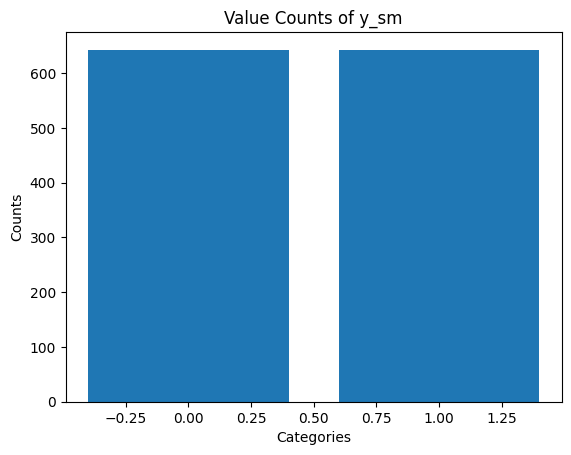

In [53]:
# Visualizing the balanced accident_severity data

y_sm_counts = y_sm.value_counts()

# Create a bar plot
plt.bar(y_sm_counts.index, y_sm_counts.values)

# Insert labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Value Counts of y_sm')

# display the plot
plt.show()


- The data is now balanced and ready to be used

#### Split the Dataset

In [55]:
# data spliting into training and testing

from sklearn.model_selection import train_test_split

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size=0.3, random_state=0,shuffle=True)

#### Use randomforest to train the predictive model using BOW

In [56]:
#import the library
from sklearn.ensemble import RandomForestClassifier

rand_f = RandomForestClassifier(random_state = 0, n_jobs = -1)

#train the model

rand_f.fit(x_train_sm, y_train_sm)

RandomForestClassifier(n_jobs=-1, random_state=0)

##### Classification Report

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def score_metrics(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(9, 7))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


##### Make prediction

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       203
           1       0.76      0.85      0.80       183

    accuracy                           0.80       386
   macro avg       0.81      0.81      0.80       386
weighted avg       0.81      0.80      0.80       386



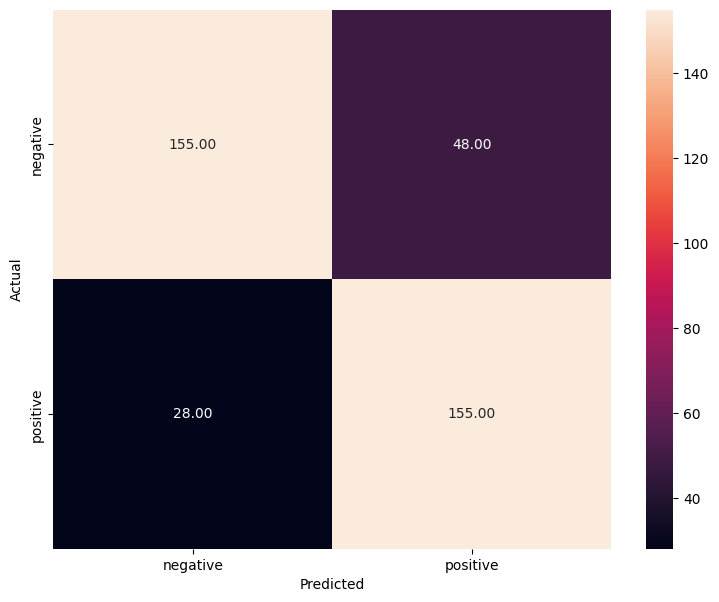

In [59]:
# make prediction

y_pred = rand_f.predict(x_test_sm)

#check the metrics

score_metrics(y_test_sm, y_pred)

##### generate the top 50 top words

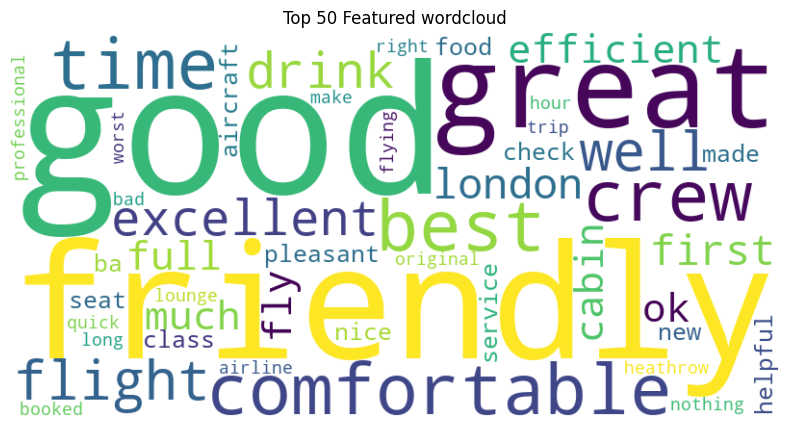

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_top50_words(model, all_features):
    topfeature = ''
    feat = model.feature_importances_
    feature = sorted(range(len(feat)), key=lambda k: feat[k], reverse=True)[:50]
    for i in feature:
        topfeature += all_features[i]
        topfeature += ' '
    
    wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400).generate(topfeature)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Top 50 Featured wordcloud')
    plt.axis('off')
    plt.show()

# Call the function with the appropriate parameters
features = vec_count.get_feature_names_out()
get_top50_words(rand_f, features)


- The top most appearing words observed are good, excellent, best,comfortable, great, efficient, friendly and others

##### Top featured words

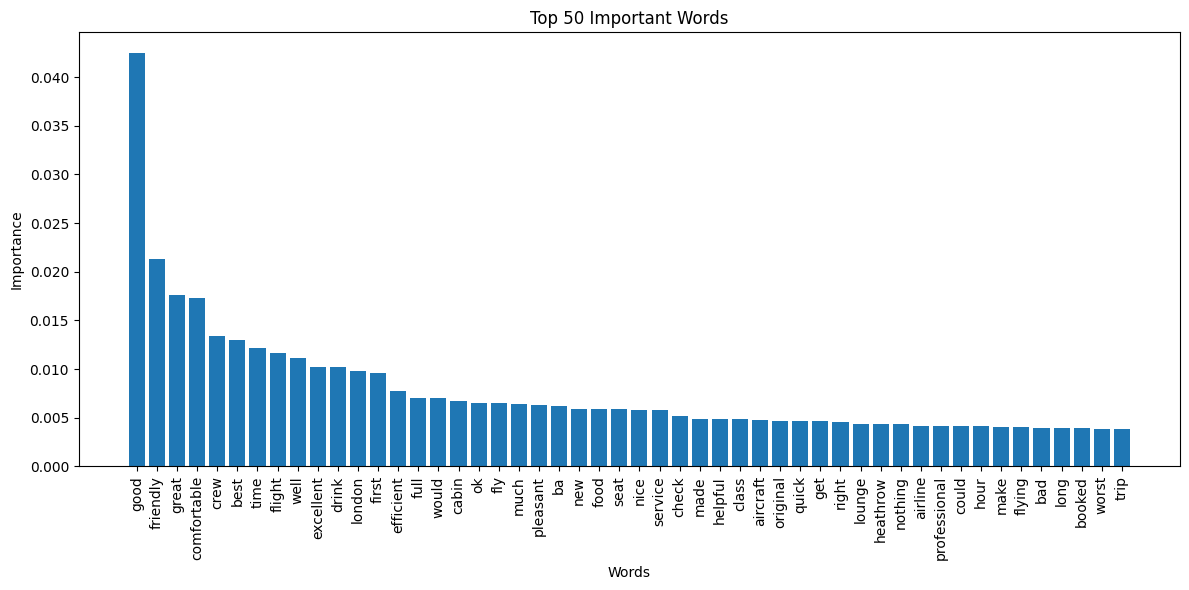

In [61]:
import matplotlib.pyplot as plt

def get_top50_words(model, all_features):
    feat_importance = model.feature_importances_
    sorted_idx = feat_importance.argsort()[::-1]
    
    top_features = [all_features[idx] for idx in sorted_idx[:50]]
    top_importances = feat_importance[sorted_idx][:50]

    return top_features, top_importances

features = vec_count.get_feature_names_out()
top_features, top_importances = get_top50_words(rand_f, features)

plt.figure(figsize=(12, 6))
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Importance')
plt.title('Top 50 Important Words')
plt.tight_layout()
plt.show()